# Notebook Preparation

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

IMPORTANT! FIX THE PATHS!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

PATHS + GoogleDrive

In [1]:
import os
import sys

try:
    ##################################################################################
    import google.colab
    print("Running on Google Colab. Mounting Google Drive...")

    from google.colab import drive, files
    drive.mount("/content/drive"
    , force_remount=True
    )

    main_directory_path = "./drive/My Drive/Group14/"
    data_path = main_directory_path + "Data/"
    output_path = data_path + "Output/"
    plot_path = output_path + "Plots/"
    dataset_path = data_path + "Dataset/"
    features_path = data_path + "Features/"
    script_path = main_directory_path + 'Scripts/'
    sys.path.append(script_path)

    print("Gooogle Drive mounted!")
    ##################################################################################


    ##################################################################################
    print("Loading Functions...")

    import EDA_Functions
    import Feature_Extraction

    print("Functions are ready!")
    ##################################################################################

except ImportError:
    print("Running in a local environment.")

    # ain_directory_path = "./drive/My Drive/Colab Notebooks/RDkit experimentation/"
    # script_path = main_directory_path + 'Scripts/'
    # data_path = main_directory_path + "Data/"
    # dataset_path = data_path + "Dataset/"
    # features_path = data_path + "Features/"


Running on Google Colab. Mounting Google Drive...
Mounted at /content/drive
Gooogle Drive mounted!
Loading Functions...
Running in a local environment.


Install

In [2]:
!pip install --upgrade -q rdkit py3Dmol #

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.0 MB/s eta 0:00:00


Imports

In [3]:
# Standard libraries
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# RDKit library
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, AllChem, RDKFingerprint, MACCSkeys, rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps

# 3D modeling
import py3Dmol

# Scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Local application/library specific imports
from EDA_Functions import sort_words, remove_duplicates, check_duplicates, save_figure
from EDA_Functions import check_graph_2d, display_molecule, check_graph_3d
# from feature_extraction import add_selected_fingerprints, add_all_descriptors


!pip install wordcloud
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'EDA_Functions'

# Loading Original Dataset

In [ ]:
dataset_ex = ""
datasets = [f for f in os.listdir(dataset_path+'/old') if f.endswith(".csv") and f not in dataset_ex]
print(datasets)
dataset = datasets[0]

['molecule_smiles.csv', 'molecule_smiles_processed.csv', 'molecule_with_canonical_smiles.csv', 'smiles_descriptors.csv', 'smiles_descriptors_processed_no_scale.csv', 'smiles_descriptors_processed_minmax.csv', 'smiles_descriptors_fingerprints_fused.csv', 'smiles_fingerprints.csv']


In [ ]:
df = pd.read_csv(dataset_path+'/old/' + dataset)
print(df.head())
print("\nShape: ", df.shape)

                             SMILES                   SENTENCE
0       C/C=C/C(=O)C1CCC(C=C1C)(C)C                fruity,rose
1                         COC(=O)OC      fresh,ethereal,fruity
2               Cc1cc2c([nH]1)cccc2          resinous,animalic
3            C1CCCCCCCC(=O)CCCCCCC1      powdery,musk,animalic
4  CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C  coniferous,camphor,fruity

Shape:  (4316, 2)


Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SMILES    4316 non-null   object
 1   SENTENCE  4316 non-null   object
dtypes: object(2)
memory usage: 67.6+ KB


NaN values check

In [ ]:
df.columns[df.isna().sum()>0]

Index([], dtype='object')

All uniques smells  (NOT SENTENCES)

In [ ]:
all_classes = df['SENTENCE'].str.split(',').sum()
unique_classes_series = pd.Series(np.unique(all_classes))
unique_classes_series


0        alcoholic
1        aldehydic
2       alliaceous
3           almond
4        ambergris
          ...     
104         watery
105           waxy
106    whiteflower
107           wine
108          woody
Length: 109, dtype: object

In [ ]:
class_series = pd.Series(all_classes)
class_series

0          fruity
1            rose
2           fresh
3        ethereal
4          fruity
           ...   
12844       sweet
12845    ethereal
12846         nut
12847       woody
12848      floral
Length: 12849, dtype: object

In [ ]:
class_counts = class_series.value_counts().sort_values(ascending=False)
class_counts

fruity       892
floral       634
woody        593
herbal       576
green        569
            ... 
overripe      10
ambrette       8
ammoniac       8
fennel         7
blueberry      6
Length: 109, dtype: int64

Histogram of individual smells

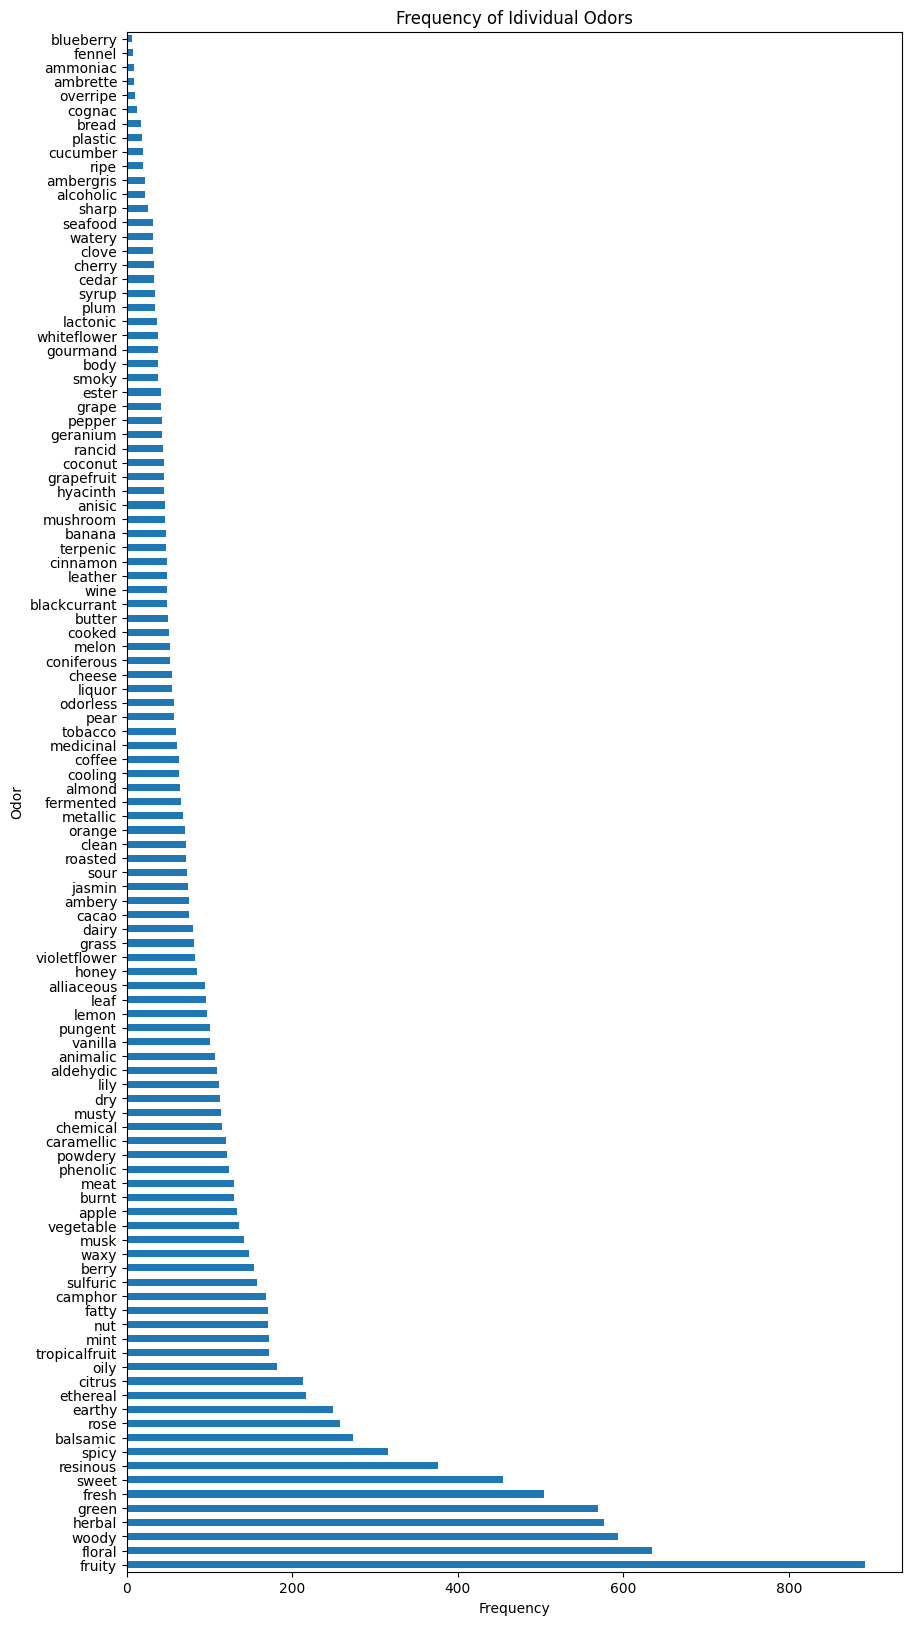

In [ ]:
plt.figure(figsize=(10,20))
class_counts.plot(kind='barh')

plt.ylabel('Odor')
plt.xlabel('Frequency')
title = 'Frequency of Idividual Odors'
plt.title(title)
save_figure(plot_path,title)
plt.show()

All sentences with sorted words

In [ ]:
sorted_sentences = df['SENTENCE'].apply(sort_words)
sorted_sentences

0                     fruity,rose
1           ethereal,fresh,fruity
2               animalic,resinous
3           animalic,musk,powdery
4       camphor,coniferous,fruity
                  ...            
4311                citrus,floral
4312                earthy,watery
4313               ethereal,sweet
4314                          nut
4315                 floral,woody
Name: SENTENCE, Length: 4316, dtype: object

Number of Odorless

In [ ]:
combination_counts = df.groupby(sorted_sentences).size()
sorted_combination_counts = combination_counts.sort_values(ascending=False)
sorted_combination_counts

SENTENCE
odorless                                              57
mint                                                  36
fruity                                                32
woody                                                 28
oily                                                  24
                                                      ..
butter,sour,vanilla                                    1
butter,sweet                                           1
cacao,caramellic,coffee                                1
cacao,caramellic,coffee,green,meat,musty,vegetable     1
citrus,spicy                                           1
Length: 2782, dtype: int64

Histogram of all sentences

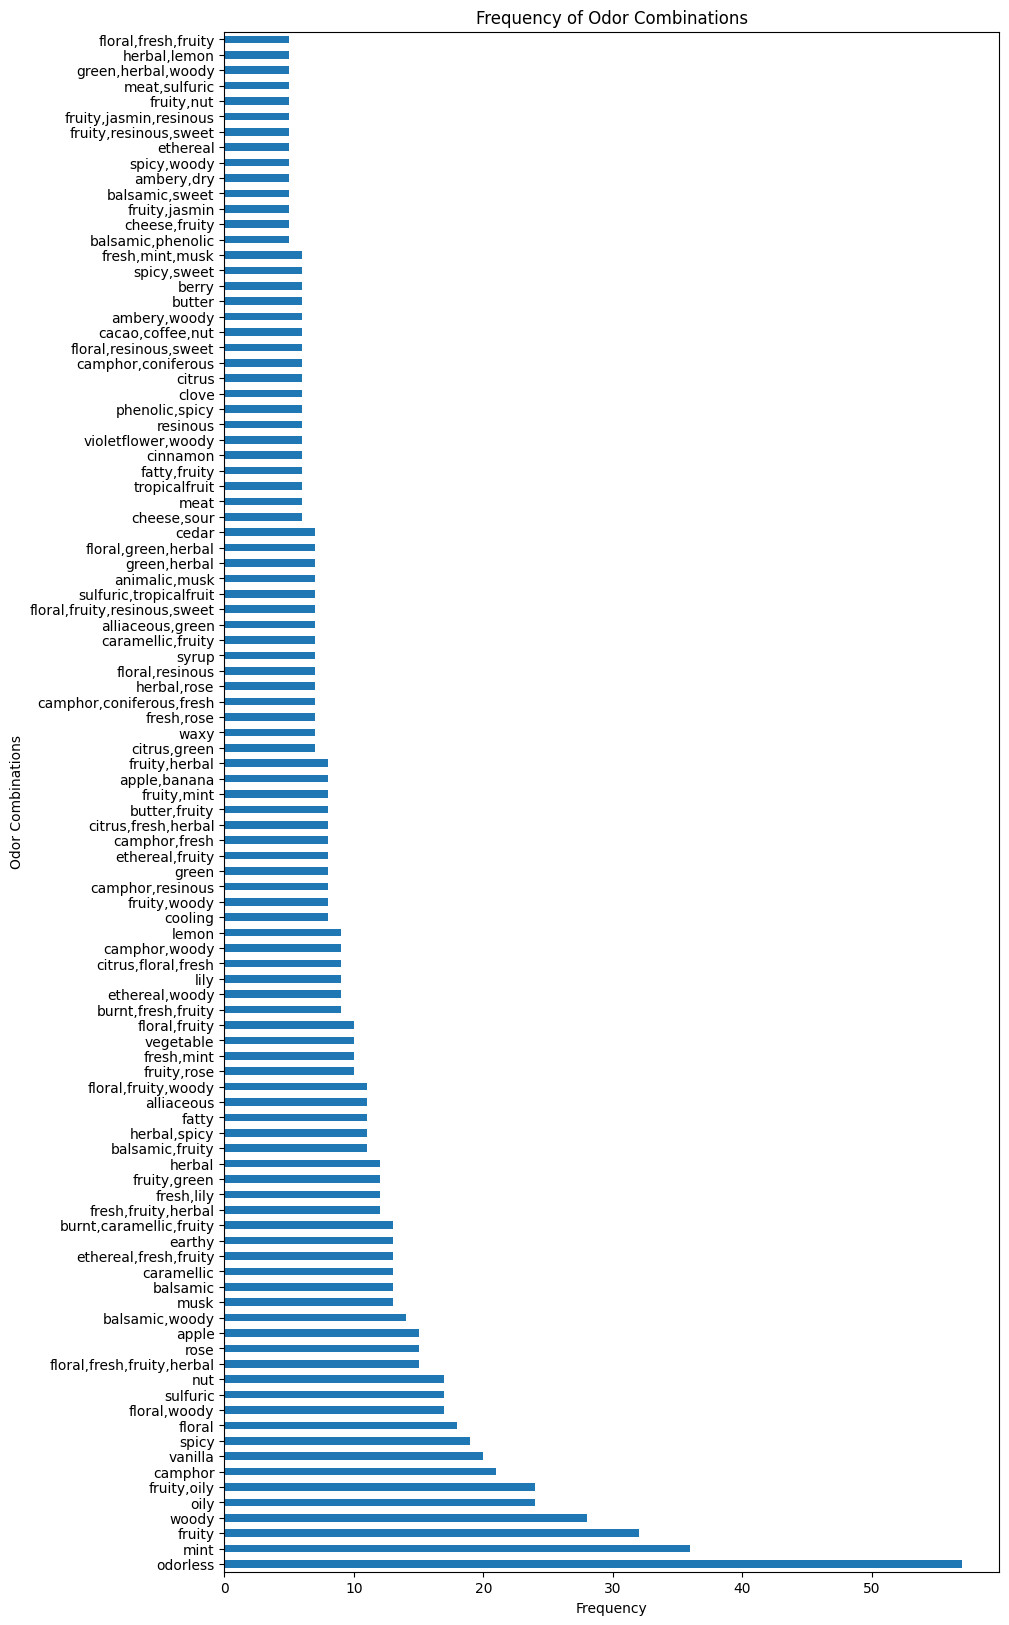

In [ ]:
plt.figure(figsize=(10,20))
sorted_combination_counts[0:100].plot(kind='barh')

plt.ylabel('Odor Combinations')
plt.xlabel('Frequency')
title = 'Frequency of Odor Combinations'
plt.title(title)
save_figure(plot_path,title)
plt.show()

# Duplicates inside the Sentences

Function to check the duplicates smells in sentences to each molecular.

In [ ]:
duplicates_mask = df['SENTENCE'].apply(check_duplicates)

In [ ]:
df_duplicates = df[duplicates_mask]
df_duplicates

,SMILES,SENTENCE
129,C=CCC1(C(C)(C)CCCCC1(C)C)O,"musk,earthy,camphor,earthy"
147,C=C[C@@](CCC=C(C)C)(O)C,"fresh,floral,woody,woody,pepper"
148,CC1CC(C)(CO1)c1ccccc1,"green,green,fruity,grapefruit,camphor,woody"
161,CC1C2Cc3ccccc3C2OC(C)O1,"floral,whiteflower,grapefruit,sweet,floral,ger..."
169,CCC(CCOC(=O)/C(=C/C)/C)C,"herbal,fruity,apple,herbal"
...,...,...
3921,C=C(C)CCOC(=O)C(C)(C)C,"fresh,herbal,berry,apple,herbal,rose"
3943,CC(C)CC(=O)OC(C)(C)C1CC=C(C)CC1,"sweet,resinous,green,resinous,rancid,orange"
3963,CC1CCC(C(=O)C)C(C1)O,"pungent,sweet,floral,sweet"
4148,CC[C@@]1(O)[C@]2(C)CC[C@H](C1(C)C)C2,"earthy,musk,earthy,ethereal"


In [ ]:
sentence = df['SENTENCE'][4198]

Fix the duplicates odors in the sentences

In [ ]:
df['SENTENCE'] = df['SENTENCE'].apply(remove_duplicates)
df

,SMILES,SENTENCE
0,C/C=C/C(=O)C1CCC(C=C1C)(C)C,"fruity,rose"
1,COC(=O)OC,"ethereal,fruity,fresh"
2,Cc1cc2c([nH]1)cccc2,"animalic,resinous"
3,C1CCCCCCCC(=O)CCCCCCC1,"musk,animalic,powdery"
4,CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C,"coniferous,fruity,camphor"
...,...,...
4311,CCOC(=O)[C@]12CCC[C@@H]2[C@H]2C[C@@H]1CC2,"citrus,floral"
4312,CC1(O)C2(C)CCCC1(C)CC2,"earthy,watery"
4313,C1CC(=N[C@@H]1C(=O)O)O,"ethereal,sweet"
4314,CCCc1c(C)ncc(C)n1,nut


In [ ]:
print(sentence)
print(df['SENTENCE'][4198])

spicy,spicy,floral,herbal,woody
woody,herbal,spicy,floral


In [ ]:
duplicates_mask = df['SENTENCE'].apply(check_duplicates)
df_duplicates = df[duplicates_mask]
df_duplicates

,SMILES,SENTENCE


In [ ]:
combination_counts = df.groupby(df['SENTENCE'].apply(sort_words)).size()
sorted_combination_counts = combination_counts.sort_values(ascending=False)
sorted_combination_counts

SENTENCE
odorless                                              57
mint                                                  36
fruity                                                32
woody                                                 28
oily                                                  24
                                                      ..
cacao,caramellic,coffee,green,meat,musty,vegetable     1
cacao,caramellic,coffee,musty,nut                      1
cacao,caramellic,coffee,musty,nut,vegetable            1
cacao,caramellic,dairy,fruity,vanilla                  1
citrus,rose,violetflower                               1
Length: 2770, dtype: int64

In [ ]:
df.to_csv(dataset_path+'molecule_smiles_processed.csv', index=False)

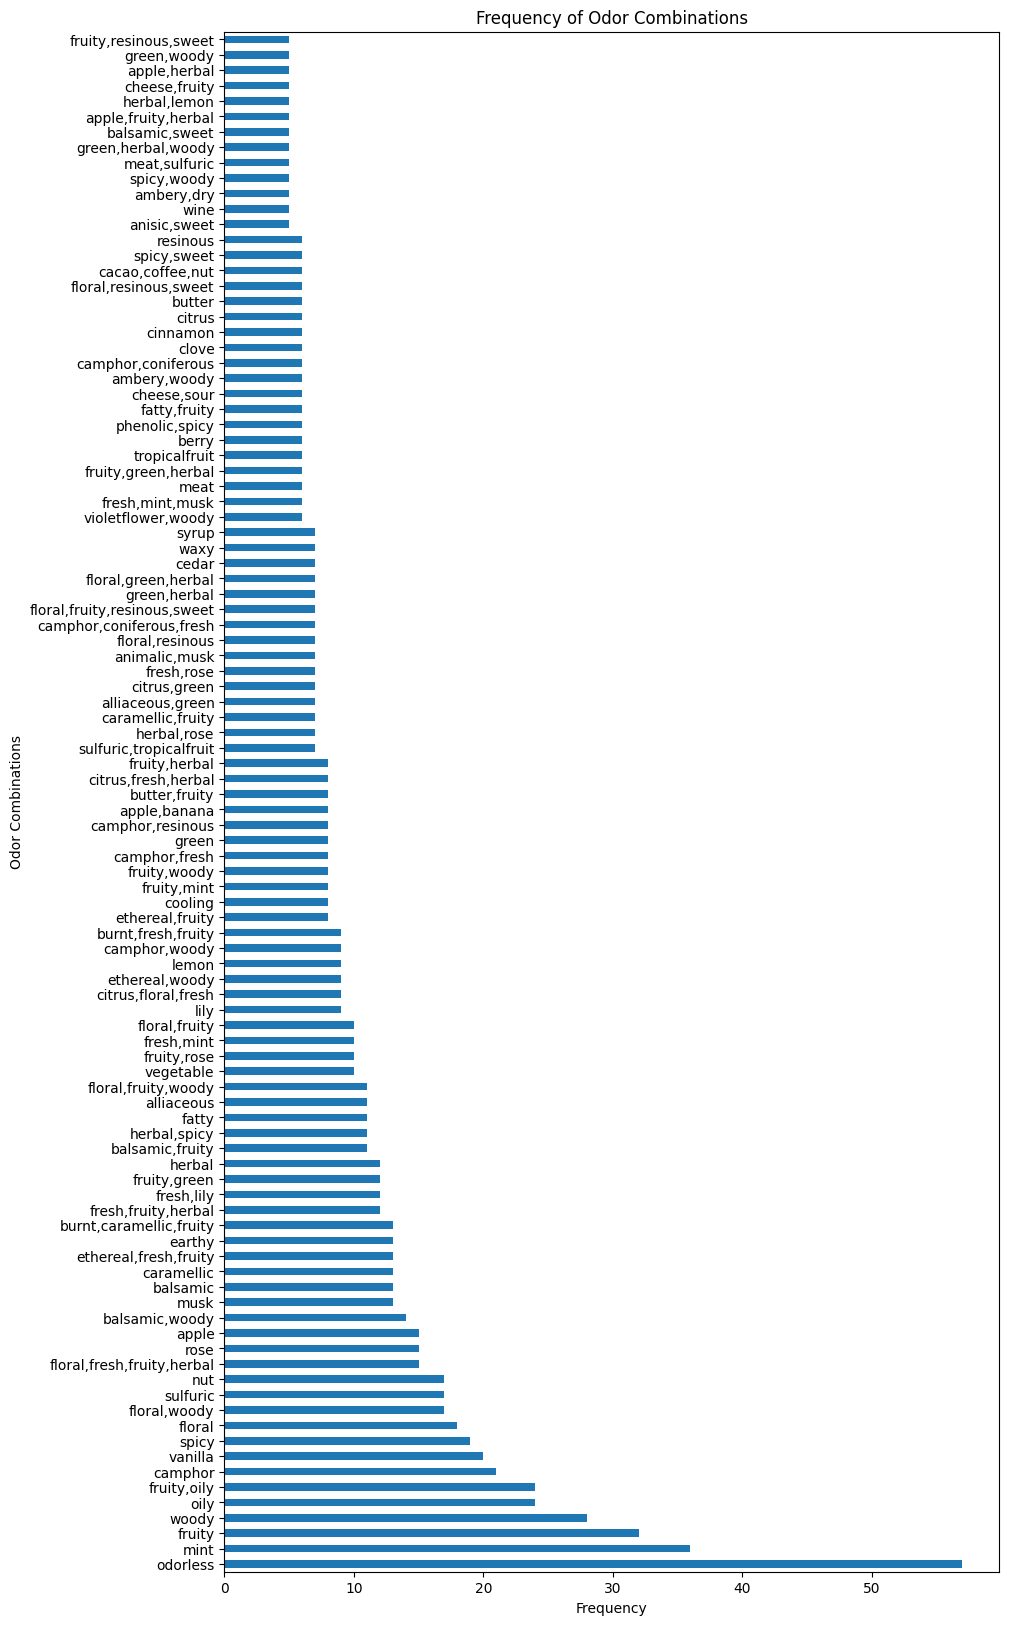

In [ ]:
plt.figure(figsize=(10,20))
sorted_combination_counts[0:100].plot(kind='barh')

plt.ylabel('Odor Combinations')
plt.xlabel('Frequency')
title = 'Frequency of Odor Combinations'
plt.title(title)
save_figure(plot_path,title)
plt.show()

In [ ]:
all_classes = df['SENTENCE'].str.split(',').sum()
class_series = pd.Series(all_classes)
class_counts = class_series.value_counts().sort_values(ascending=False)
class_counts

fruity       892
floral       632
woody        588
herbal       564
green        556
            ... 
overripe      10
ambrette       8
ammoniac       8
fennel         7
blueberry      6
Length: 109, dtype: int64

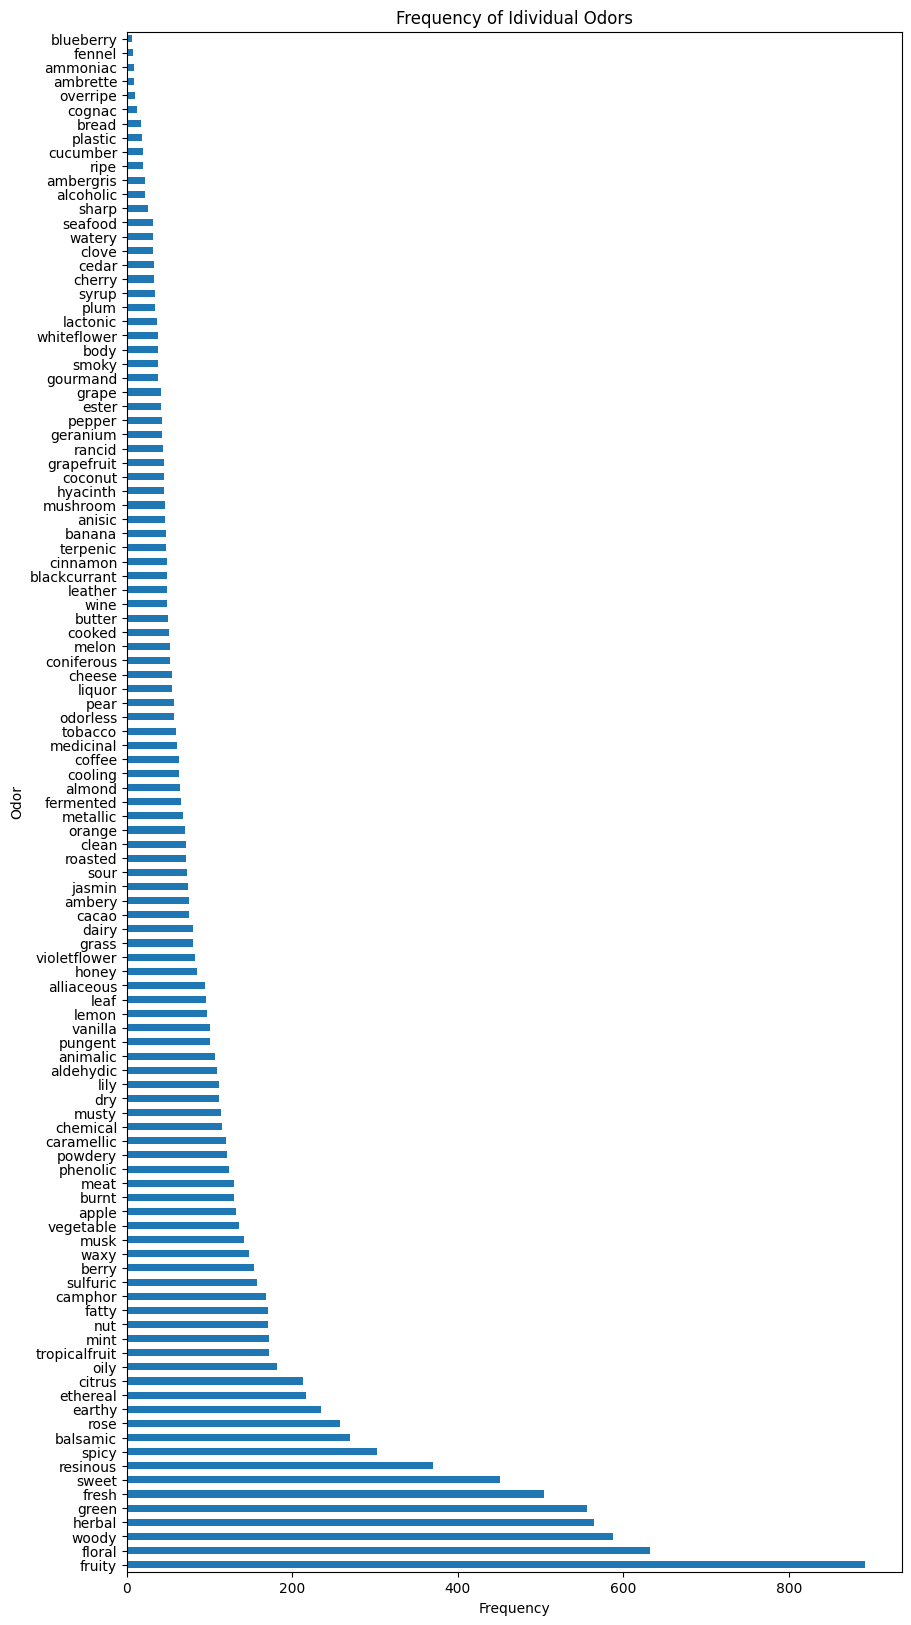

In [ ]:
plt.figure(figsize=(10,20))
class_counts.plot(kind='barh')

plt.ylabel('Odor')
plt.xlabel('Frequency')
title = 'Frequency of Idividual Odors'
plt.title(title)
save_figure(plot_path,title)
plt.show()

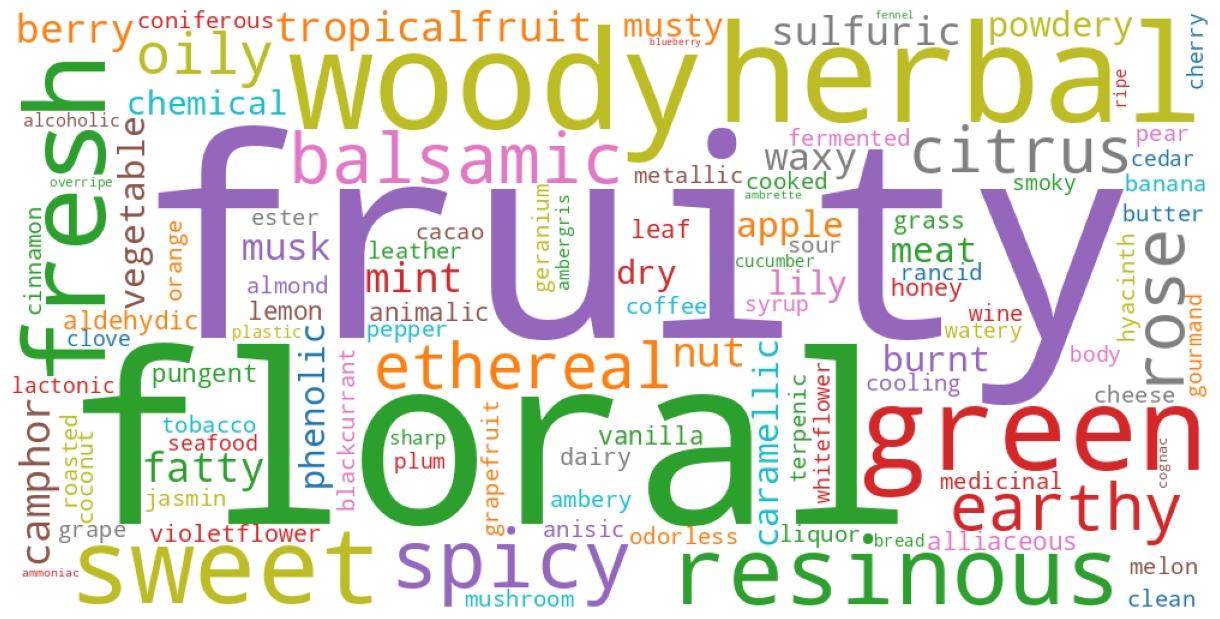

In [ ]:
# Assuming you have a DataFrame named class_counts with two columns: 'word' and 'frequency'
# You can create a dictionary from the DataFrame to use with WordCloud
word_freq_dict = dict(zip(class_counts.index, class_counts.values))

# Define a custom colormap (e.g., using the "tab20" colormap)
custom_cmap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Create a WordCloud object with the frequency dictionary and custom colormap
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap=custom_cmap).generate_from_frequencies(word_freq_dict)

# Plot the WordCloud image
plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
a = df['SENTENCE'].str.split(',').tolist()

In [ ]:
# Flatten the list of odors in each combination into a single list
all_odors = [odor for sublist in a for odor in sublist]

# Count the frequency of each individual odor
odor_frequency = Counter(all_odors)

plot_data = pd.DataFrame({
    'Odor': list(odor_frequency.keys()),
    'Frequency': list(odor_frequency.values())
})

max_freq = max(plot_data['Frequency'])
plot_data['NormalizedFreq'] = plot_data['Frequency'] / max_freq

plt.figure(figsize=(10, 20))

for i, row in plot_data.iterrows():
    plt.scatter(x=row['Frequency'], y=row['Odor'], s=row['NormalizedFreq']*1000, alpha=0.5)  # Swap x and y

plt.xlabel('Frequency')
plt.ylabel('Odors')
plt.title('Frequency of Individual Odors in Combinations')
plt.xticks(rotation=90)

plt.show()


# Duplicate and no Duplicate Smiles

* Canonicalization:
  * (SMILES strings can represent the same molecule in many different ways, due to the flexibility in the notation. When conerting SMILES string to a molecule and back to a SMILES string, RDKit generates a canonical SMILES string, which is a standardized representation of the molecule. If the original SMILES string was not canonical, the new SMILES string will be different.)

* Implicit vs Explicit Hydrogens
* Aromaticity
* Removal of Unspecified Chirality
* Normalization of Functional Groups

## No Duplicate Smiles

From the given Dataset

In [ ]:
has_duplicates = df.duplicated(subset='SMILES').any()
print(has_duplicates)

False


## Duplicate Smiles

In [ ]:
data = df.copy()

Mol from Smiles and Mol to Smiles.

In [ ]:
data['Molecules'] = data['SMILES'].apply(Chem.MolFromSmiles)
data["Canonical_SMILES"] = data['Molecules'].apply(Chem.MolToSmiles)

In [ ]:
duplicates_mask = data['Canonical_SMILES'].duplicated(keep=False)

Duplicates  (canonical smiles)

In [ ]:
smiles_duplicates = data[duplicates_mask]
smiles_duplicates

,SMILES,SENTENCE,Molecules,Canonical_SMILES
0,C/C=C/C(=O)C1CCC(C=C1C)(C)C,"fruity,rose",<rdkit.Chem.rdchem.Mol object at 0x7b2a57980b30>,C/C=C/C(=O)C1CCC(C)(C)C=C1C
2,Cc1cc2c([nH]1)cccc2,"animalic,resinous",<rdkit.Chem.rdchem.Mol object at 0x7b2a57980e40>,Cc1cc2ccccc2[nH]1
8,CCc1ccc(cc1)CC(C=O)(C)C,"clean,fresh",<rdkit.Chem.rdchem.Mol object at 0x7b2a57980890>,CCc1ccc(CC(C)(C)C=O)cc1
14,O=C1CCC2C(O1)CCCC2,"fruity,vanilla,sharp,coconut",<rdkit.Chem.rdchem.Mol object at 0x7b2a579804a0>,O=C1CCC2CCCCC2O1
19,CC(C)C(=O)C,camphor,<rdkit.Chem.rdchem.Mol object at 0x7b2a57980200>,CC(=O)C(C)C
...,...,...,...,...
4303,CC1CCC(OC(=O)C1)C(C)C,"mint,rose,spicy",<rdkit.Chem.rdchem.Mol object at 0x7b2a55239000>,CC1CCC(C(C)C)OC(=O)C1
4307,CC(=O)Oc1cccc(c1)C,"fruity,phenolic,floral",<rdkit.Chem.rdchem.Mol object at 0x7b2a552391c0>,CC(=O)Oc1cccc(C)c1
4308,OC/C=C/c1ccccc1,"sweet,balsamic,cinnamon,floral",<rdkit.Chem.rdchem.Mol object at 0x7b2a55239230>,OC/C=C/c1ccccc1
4309,CCCC(C)C=Nc1ccccc1C(=O)OC,"citrus,sweet,grape,green,resinous,spicy",<rdkit.Chem.rdchem.Mol object at 0x7b2a552392a0>,CCCC(C)C=Nc1ccccc1C(=O)OC


No Duplicates

In [ ]:
smiles_no_duplicates = data[~duplicates_mask]
smiles_no_duplicates

,SMILES,SENTENCE,Molecules,Canonical_SMILES
1,COC(=O)OC,"ethereal,fruity,fresh",<rdkit.Chem.rdchem.Mol object at 0x7b2a57980ac0>,COC(=O)OC
3,C1CCCCCCCC(=O)CCCCCCC1,"musk,powdery,animalic",<rdkit.Chem.rdchem.Mol object at 0x7b2a57980f90>,O=C1CCCCCCCCCCCCCCC1
4,CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C,"fruity,coniferous,camphor",<rdkit.Chem.rdchem.Mol object at 0x7b2a57980a50>,CC(C)CC(=O)OC1CC2CCC1(C)C2(C)C
5,CCC[C@H](CCO)SC,tropicalfruit,<rdkit.Chem.rdchem.Mol object at 0x7b2a579809e0>,CCC[C@H](CCO)SC
6,CC(C)C(=O)OCc1ccco1,"fruity,coffee",<rdkit.Chem.rdchem.Mol object at 0x7b2a57980970>,CC(C)C(=O)OCc1ccco1
...,...,...,...,...
4311,CCOC(=O)[C@]12CCC[C@@H]2[C@H]2C[C@@H]1CC2,"citrus,floral",<rdkit.Chem.rdchem.Mol object at 0x7b2a55239380>,CCOC(=O)[C@@]12CCC[C@@H]1[C@@H]1CC[C@H]2C1
4312,CC1(O)C2(C)CCCC1(C)CC2,"watery,earthy",<rdkit.Chem.rdchem.Mol object at 0x7b2a552393f0>,CC12CCCC(C)(CC1)C2(C)O
4313,C1CC(=N[C@@H]1C(=O)O)O,"ethereal,sweet",<rdkit.Chem.rdchem.Mol object at 0x7b2a55239460>,O=C(O)[C@@H]1CCC(O)=N1
4314,CCCc1c(C)ncc(C)n1,nut,<rdkit.Chem.rdchem.Mol object at 0x7b2a552394d0>,CCCc1nc(C)cnc1C


In [ ]:
smiles_sorted_df = smiles_duplicates.sort_values(by='Canonical_SMILES')
smiles_sorted_df
# smiles_sorted_df_descending = smiles_duplicates.sort_values(by='SMILES_new', ascending=False)

,SMILES,SENTENCE,Molecules,Canonical_SMILES
1634,C#CC(CCC=C(C)C)(O)C,"spicy,herbal,floral",<rdkit.Chem.rdchem.Mol object at 0x7b2a540eb5a0>,C#CC(C)(O)CCC=C(C)C
3851,C#CC(C)(CCC=C(C)C)O,"dry,musk,sweet,ambrette,waxy",<rdkit.Chem.rdchem.Mol object at 0x7b2a55214890>,C#CC(C)(O)CCC=C(C)C
4000,CCC(C)C1CCCCC1(C#C)OC(=O)C,"dry,ambery",<rdkit.Chem.rdchem.Mol object at 0x7b2a5521ca50>,C#CC1(OC(C)=O)CCCCC1C(C)CC
1673,CCC(C1CCCCC1(C#C)OC(=O)C)C,"musk,fruity,herbal,ambrette,woody",<rdkit.Chem.rdchem.Mol object at 0x7b2a540e4740>,C#CC1(OC(C)=O)CCCCC1C(C)CC
1611,CCC(=O)CCC1C(=CCCC1(C)C)C.C#CCO,"animalic,dry,ambergris,metallic,fresh,ambery",<rdkit.Chem.rdchem.Mol object at 0x7b2a540eab90>,C#CCO.CCC(=O)CCC1C(C)=CCCC1(C)C
...,...,...,...,...
1953,O(Cc1ccco1)Cc1ccco1,"ethereal,fruity,burnt",<rdkit.Chem.rdchem.Mol object at 0x7b2a540982e0>,c1coc(COCc2ccco2)c1
4259,c1cc(CSSCc2ccco2)oc1,"coffee,alliaceous,meat,vegetable,earthy",<rdkit.Chem.rdchem.Mol object at 0x7b2a5522fc30>,c1coc(CSSCc2ccco2)c1
2376,S(Cc1ccco1)SCc1ccco1,"sulfuric,coffee,burnt",<rdkit.Chem.rdchem.Mol object at 0x7b2a540b7d10>,c1coc(CSSCc2ccco2)c1
344,C1CCCCCc2c(CCCC1)nco2,"earthy,terpenic,woody,green",<rdkit.Chem.rdchem.Mol object at 0x7b2a57793c30>,c1nc2c(o1)CCCCCCCCCC2


In [ ]:
data.to_csv(dataset_path+'molecule_with_canonical_smiles.csv', index=False)

Choose from the indices on the left, to check the graphs of 2 different SMILES column ( with same smile in SMILES_new column)

Duplicate canonical but different 2D and 3D

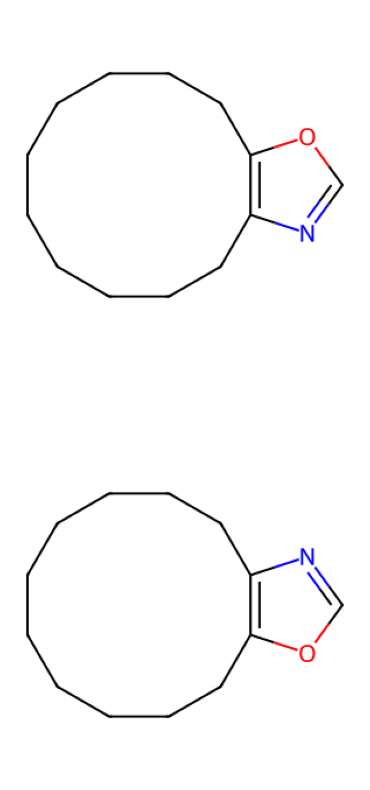

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
id1 = 344
id2 = 3159

# 2D
check_graph_2d(id1, id2)
# 3D
check_graph_3d(id1, id2)

Duplicate canonical but the same 2D different 3D

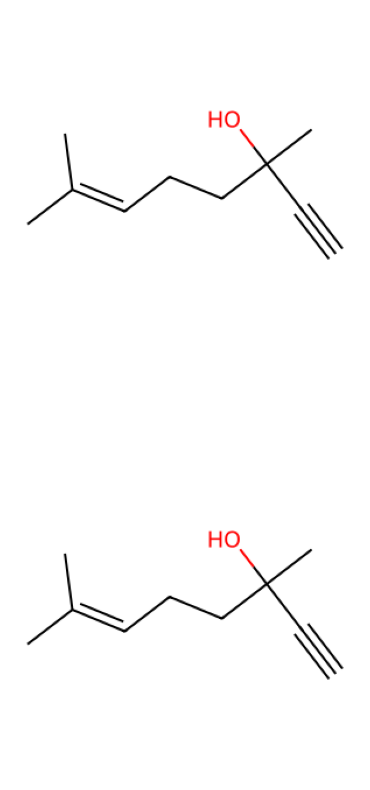

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
id1 = 1634
id2 = 3851

# 2D
check_graph_2d(id1, id2)
# 3D
check_graph_3d(id1, id2)